In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 29s 2us/step


In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

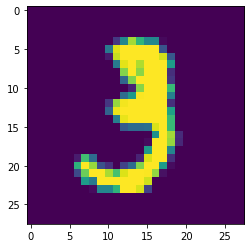

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2759 - accuracy: 0.9197 - val_loss: 0.1480 - val_accuracy: 0.9586
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1174 - accuracy: 0.9644 - val_loss: 0.1139 - val_accuracy: 0.9657
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0801 - accuracy: 0.9750 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0598 - accuracy: 0.9807 - val_loss: 0.0937 - val_accuracy: 0.9741
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.1058 - val_accuracy: 0.9716
Epoch 7/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.1044 - val_accur

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9745

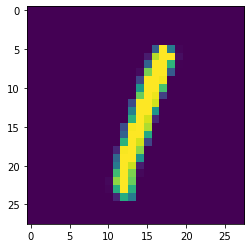

In [20]:
plt.imshow(X_test[5])

In [23]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 252ms/step


array([1], dtype=int64)